In [1]:
import pandas as pd
import numpy as np

Loading Dataset

In [7]:
    file_path = 'D:\\jobAnalysis3\\2024_Job_data.csv'
    data = pd.read_csv(file_path, encoding='ISO-8859-1')
    print(data.head())

                 Job Sector  \
0  Data Science & Analytics   
1  Data Science & Analytics   
2  Data Science & Analytics   
3  Data Science & Analytics   
4  Data Science & Analytics   

                                           Job Title  \
0              Digital Implementation, Specialist II   
1                                   Insights partner   
2  Excellent openings For Informatica MDM - Hexaw...   
3                               Sr. Business Analyst   
4                          Data Scientist, Marketing   

                                          Apply Link              comp-name  \
0  https://www.naukri.com/job-listings-digital-im...                    CWT   
1  https://www.naukri.com/job-listings-insights-p...      Hoffmann-La Roche   
2  https://www.naukri.com/job-listings-excellent-...  Hexaware Technologies   
3  https://www.naukri.com/job-listings-sr-busines...    TELUS International   
4  https://www.naukri.com/job-listings-data-scien...               Coursera   

 

Handle Missing Values

In [8]:
cleaned_data = data.dropna(subset=['Job Title','Job Sector'])

Drop unneccessary columns

In [9]:
cloumn_to_drop = ['Apply Link', 'Company Career Name']
cleaned_data= cleaned_data.drop(columns=cloumn_to_drop, errors='ignore')

Clean 'Rating star' column

In [11]:
# replacing 'No star' with NaN and convert to numeric
cleaned_data['Rating Star'] = cleaned_data['Rating Star'].replace('No Stars', np.nan).astype(float)

Extract numeric values from 'Reviews' column

In [12]:
cleaned_data['Reviews'] = cleaned_data['Reviews'].str.extract('(\d+)').astype(float)

Extract numerical salary ranges from 'Salary INR LPA'

In [13]:
#Replace 'Not disclosed' with NaN and extract numeric salary ranges
cleaned_data['Salary INR LPA'] = cleaned_data['Salary INR LPA'].replace('Not disclosed', np.nan)

In [14]:
# Convert salary range into average salary if provided
cleaned_data['Salary INR LPA'] = cleaned_data['Salary INR LPA'].str.extract(r'(\d+(?:\.\d+)?)').astype(float)

CLeaning Experience Column

In [15]:
# Extract the minimum years of experience and categorize experience levels
cleaned_data['Experience'] = cleaned_data['Experience'].str.extract(r'(\d+)').astype(float)
cleaned_data['Experience Level'] = pd.cut(
    cleaned_data['Experience'],
    bins=[0, 3, 7, np.inf],
    labels=['Junior', 'Mid', 'Senior']
)

Handle duplicates

In [16]:
cleaned_data = cleaned_data.drop_duplicates()

In [18]:
#Save the cleaned dataset to a new CSV file
cleaned_data.to_csv('D:\\jobAnalysis3\\2024_Job_data_cleaned.csv', index=False)

In [19]:
print(cleaned_data.head())

                 Job Sector  \
0  Data Science & Analytics   
1  Data Science & Analytics   
2  Data Science & Analytics   
3  Data Science & Analytics   
4  Data Science & Analytics   

                                           Job Title              comp-name  \
0              Digital Implementation, Specialist II                    CWT   
1                                   Insights partner      Hoffmann-La Roche   
2  Excellent openings For Informatica MDM - Hexaw...  Hexaware Technologies   
3                               Sr. Business Analyst    TELUS International   
4                          Data Scientist, Marketing               Coursera   

   Rating Star  Reviews  Experience  Salary INR LPA  \
0          4.0    359.0         3.0             NaN   
1          NaN      NaN         5.0             NaN   
2          3.7   4671.0         4.0             NaN   
3          3.8    892.0         8.0             NaN   
4          3.8     18.0         4.0             NaN   

       

In [21]:
cleaned_data.head()

,Job Sector,Job Title,comp-name,Rating Star,Reviews,Experience,Salary INR LPA,Job Location,Job Description,Skills,job-post-day,Experience Level
0,Data Science & Analytics,"Digital Implementation, Specialist II",CWT,4.0,359.0,3.0,NaN,"Kolkata, Mumbai, New Delhi, Hyderabad/Secunder...",Bachelor s Degree and / or combined equivalent...,"Training, Analyst, Excel, Travel management, Q...",1 Day Ago,Junior
1,Data Science & Analytics,Insights partner,Hoffmann-La Roche,NaN,NaN,5.0,NaN,"Kolkata, Mumbai, New Delhi, Hyderabad/Secunder...",. Educational Qualification - Must Meet: Post ...,"Procurement, Marketing analytics, Networking, ...",Just Now,Mid
2,Data Science & Analytics,Excellent openings For Informatica MDM - Hexaw...,Hexaware Technologies,3.7,4671.0,4.0,NaN,"Hybrid - Pune, Maharashtra, Chennai, Tamil Nad...",Required experience - 4 to 6yrs. Preferred Sec...,"Informatica Mdm, MDM, Master Data Management, ...",Just Now,Mid
3,Data Science & Analytics,Sr. Business Analyst,TELUS International,3.8,892.0,8.0,NaN,"Kolkata, Mumbai, New Delhi, Hyderabad/Secunder...",Shift - Canadian working hours . . Bachelors ...,"BPO, Graphics, Telecom, Agile, Technical Illus...",1 Day Ago,Senior
4,Data Science & Analytics,"Data Scientist, Marketing",Coursera,3.8,18.0,4.0,NaN,"Kolkata, Mumbai, New Delhi, Hyderabad/Secunder...",We are seeking a highly skilled and collaborat...,"Data analysis, data science, Troubleshooting, ...",6 Days Ago,Mid


Understanding the data or inspecting the data structure

key Questions :

What does each column Represent ?

What type of data I have (numerical, Categorical, text)

In [22]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45569 entries, 0 to 45631
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Job Sector        45569 non-null  object  
 1   Job Title         45569 non-null  object  
 2   comp-name         45569 non-null  object  
 3   Rating Star       40969 non-null  float64 
 4   Reviews           40971 non-null  float64 
 5   Experience        45282 non-null  float64 
 6   Salary INR LPA    6859 non-null   float64 
 7   Job Location      45569 non-null  object  
 8   Job Description   45569 non-null  object  
 9   Skills            45569 non-null  object  
 10  job-post-day      45569 non-null  object  
 11  Experience Level  43701 non-null  category
dtypes: category(1), float64(4), object(7)
memory usage: 4.2+ MB


In [23]:
cleaned_data.describe()

,Rating Star,Reviews,Experience,Salary INR LPA
count,40969.000000,40971.000000,45282.000000,6859.000000
mean,3.857841,9045.369066,4.591272,10.397252
std,0.510327,16882.019879,3.227227,12.504563
min,1.000000,2.000000,0.000000,1.000000
25%,3.700000,32.000000,3.000000,3.000000
50%,4.000000,332.000000,4.000000,6.000000
75%,4.100000,4329.000000,6.000000,13.000000
max,5.000000,72424.000000,300.000000,100.000000


Lets go through EDA

1. Job Demand : Analyzing how job posting vary over time (job-post-day)
             Check trends accross sectors and Locations.

2. Salary Distributions: Examine salary variations across job sectors, locations,and experience levels.
                      Identify outliers and trends in salary data.

3. Skills Demand: Identify the most common and in-demand skills across sectors.
               Look for correlations between skills and salaries.

4. Experience vs Salary: Analyze how experience levels (Junior, Mid, Senior) correlate with salaries.

<Axes: title={'center': 'Job Postings Over Time'}, xlabel='job-post-day'>

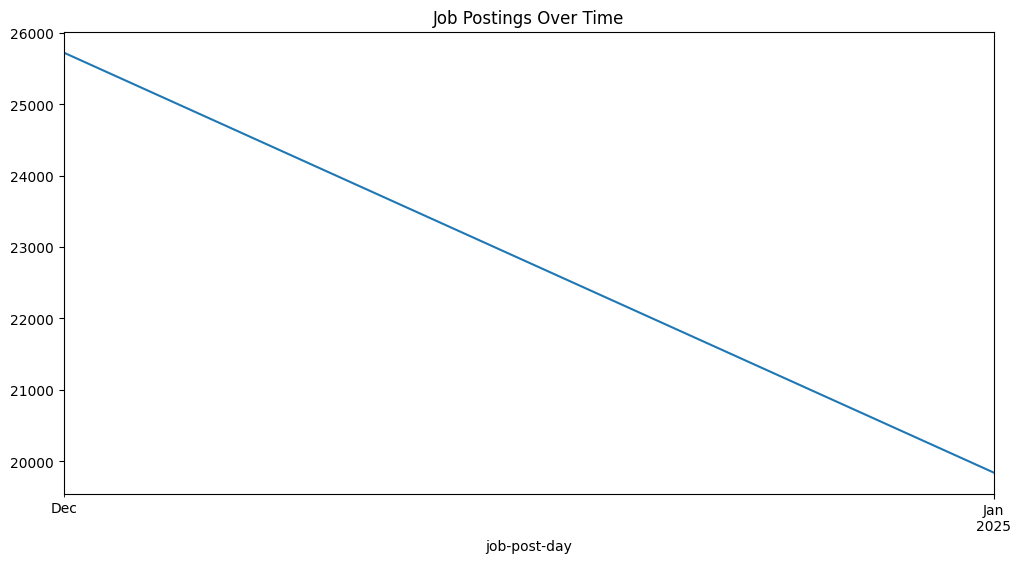

In [28]:
from dateutil import parser
from datetime import datetime, timedelta

def parse_relative_date(date_str):
	if 'Day' in date_str:
		days_ago = int(date_str.split()[0])
		return datetime.now() - timedelta(days=days_ago)
	elif 'Just Now' in date_str:
		return datetime.now()
	elif 'Days Ago' in date_str:
		days_ago = int(date_str.split()[0])
		return datetime.now() - timedelta(days=days_ago)
	elif 'Few Hours Ago' in date_str:
		return datetime.now() - timedelta(hours=1)
	elif 'Today' in date_str:
		return datetime.now()
	else:
		try:
			return parser.parse(date_str)
		except parser.ParserError:
			return np.nan

# Convert 'job-post-day' to datetime for time analysis
cleaned_data['job-post-day'] = cleaned_data['job-post-day'].apply(parse_relative_date)

# Drop rows with invalid dates
cleaned_data = cleaned_data.dropna(subset=['job-post-day'])

# Aggregate job counts by month
job_trend = cleaned_data.groupby(cleaned_data['job-post-day'].dt.to_period('M')).size()
job_trend.plot(kind='line', figsize=(12, 6), title='Job Postings Over Time')


Determining the sectors with the highest number of job postings

<Axes: title={'center': 'Top 10 Job Sectors'}, xlabel='Job Sector'>

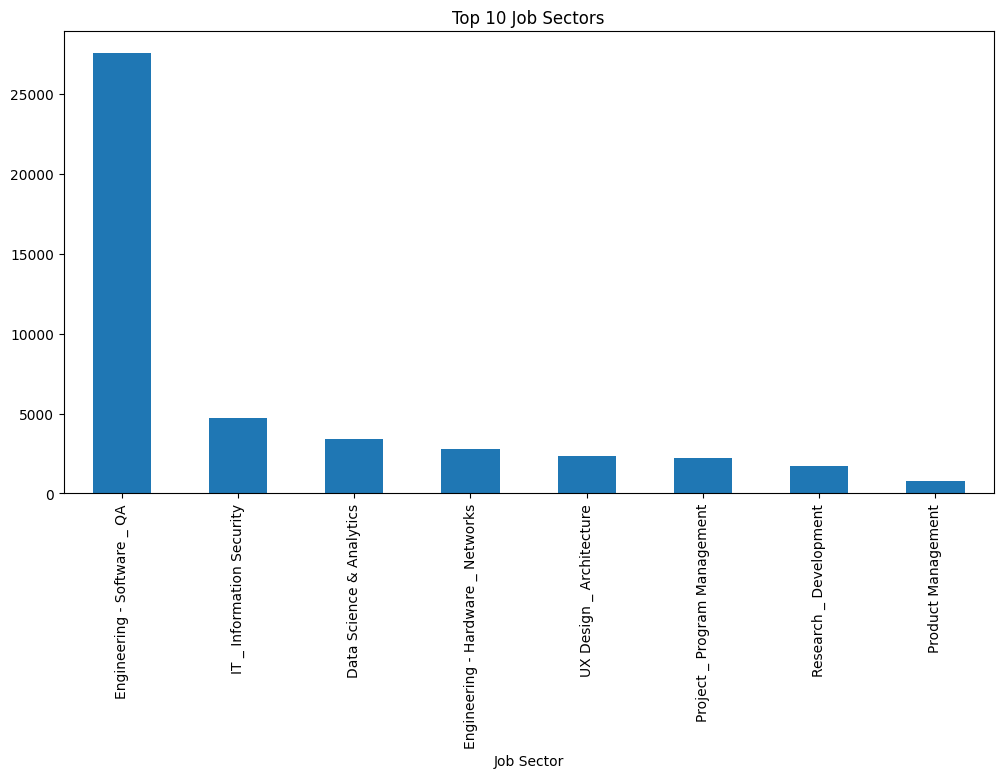

In [29]:
# Count job postings by sector
sector_counts = cleaned_data['Job Sector'].value_counts()

# Visualize top sectors
sector_counts.head(10).plot(kind='bar', figsize=(12, 6), title='Top 10 Job Sectors')


Salary Distribution

Examine how salaries cary across sectors and experience levels.

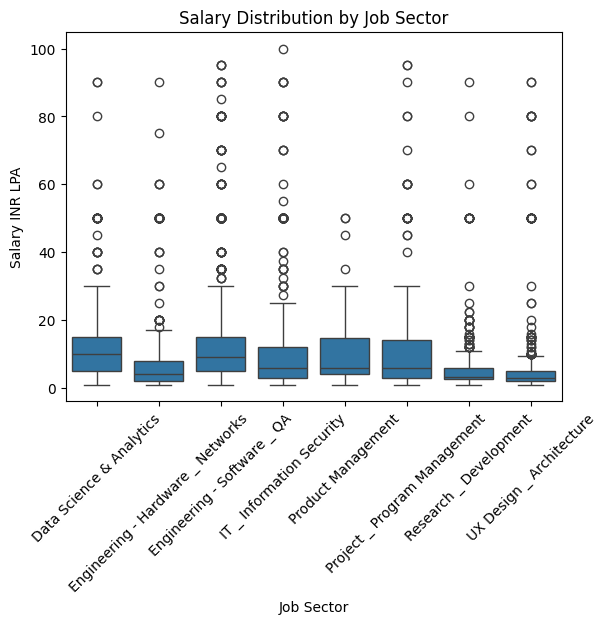

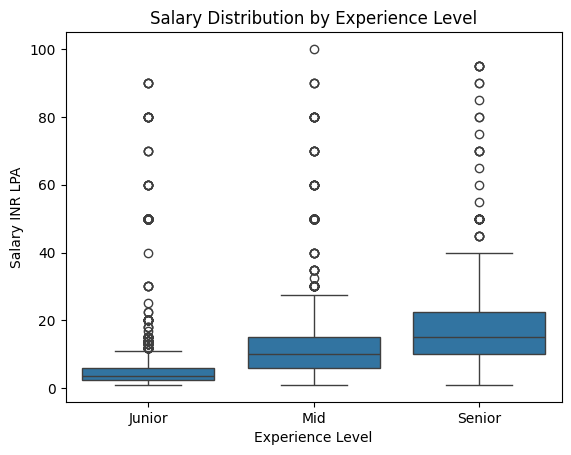

In [31]:
# Boxplot: Salary distribution by sector
from matplotlib import pyplot as plt
import seaborn as sns
sns.boxplot(data=cleaned_data, x='Job Sector', y='Salary INR LPA')
plt.xticks(rotation=45)
plt.title("Salary Distribution by Job Sector")
plt.show()

# Boxplot: Salary distribution by experience level
sns.boxplot(data=cleaned_data, x='Experience Level', y='Salary INR LPA')
plt.title("Salary Distribution by Experience Level")
plt.show()


Skills Demand

Identify the most in-demand skills

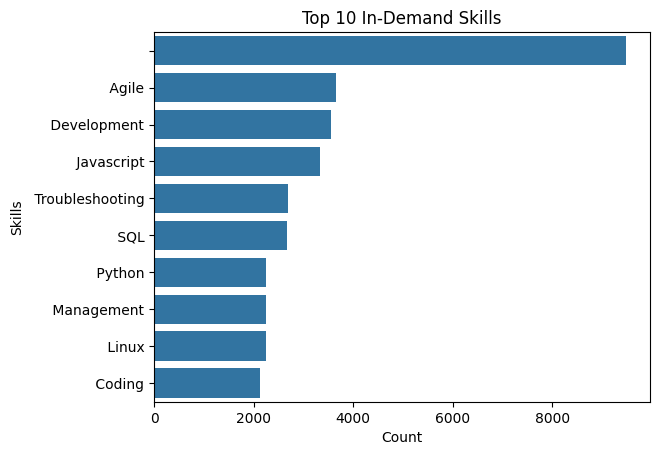

In [32]:
# Split and count skills
skills_series = cleaned_data['Skills'].str.split(',').explode()
top_skills = skills_series.value_counts().head(10)

# Visualize top skills
sns.barplot(y=top_skills.index, x=top_skills.values)
plt.title("Top 10 In-Demand Skills")
plt.xlabel("Count")
plt.ylabel("Skills")
plt.show()


Experience Vs Salary

Analyzing the relationship between experience and salaries.

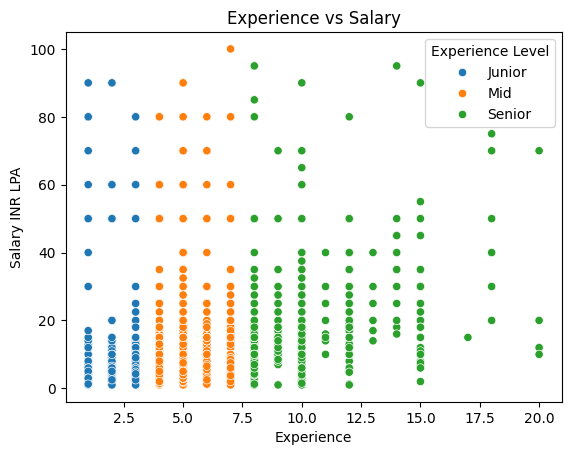

In [49]:
sns.scatterplot(data=cleaned_data, x='Experience', y='Salary INR LPA', hue='Experience Level')
plt.title("Experience vs Salary")
plt.show()


Outliers Detection

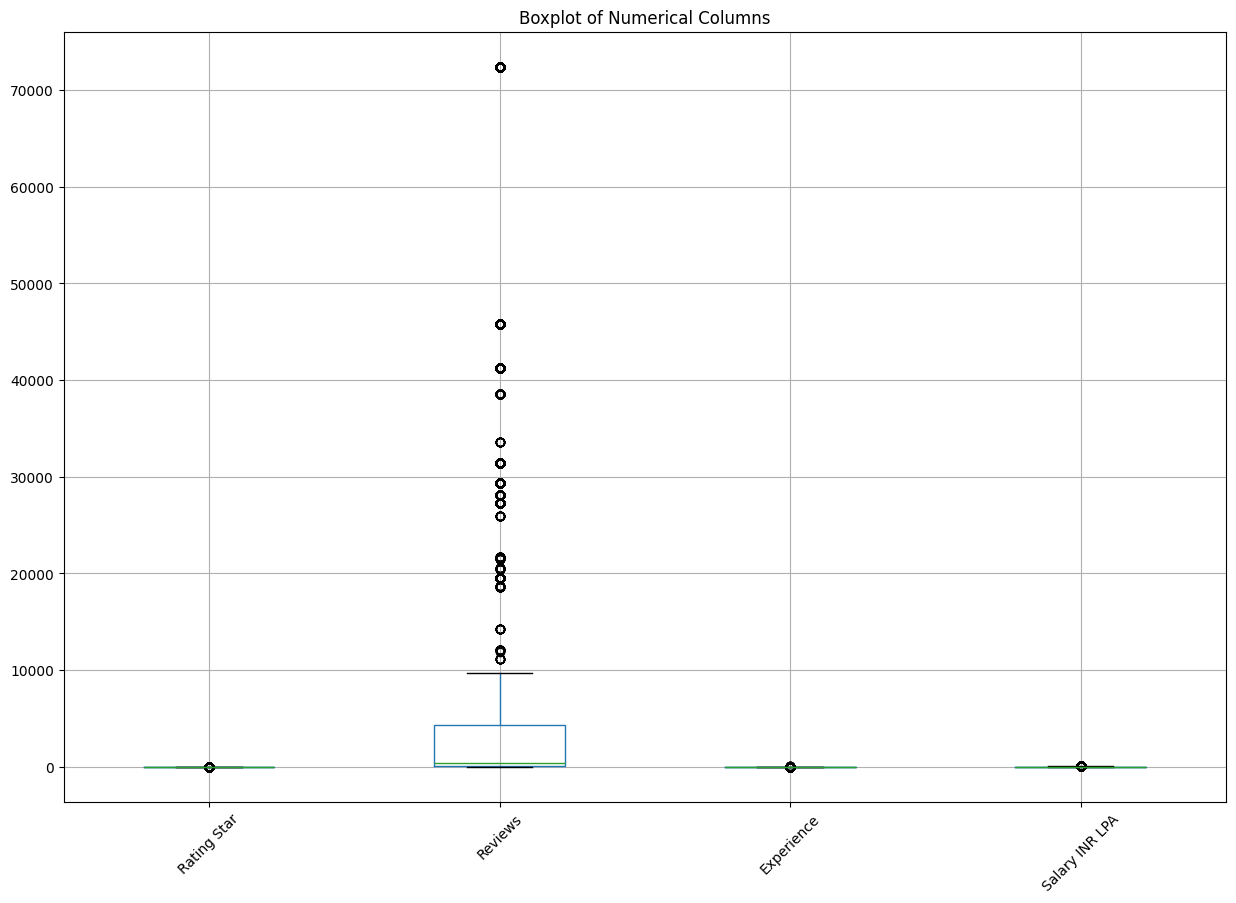

In [47]:
from scipy import stats

# Identify numerical columns
numerical_columns = cleaned_data.select_dtypes(include=[np.number]).columns

# Calculate Z-scores
z_scores = np.abs(stats.zscore(cleaned_data[numerical_columns]))

# Identify outliers
outliers = (z_scores > 3).any(axis=1)
outlier_data = cleaned_data.loc[outliers]

# Plot boxplots for numerical columns
plt.figure(figsize=(15, 10))
cleaned_data[numerical_columns].boxplot()
plt.title('Boxplot of Numerical Columns')
plt.xticks(rotation=45)
plt.show()

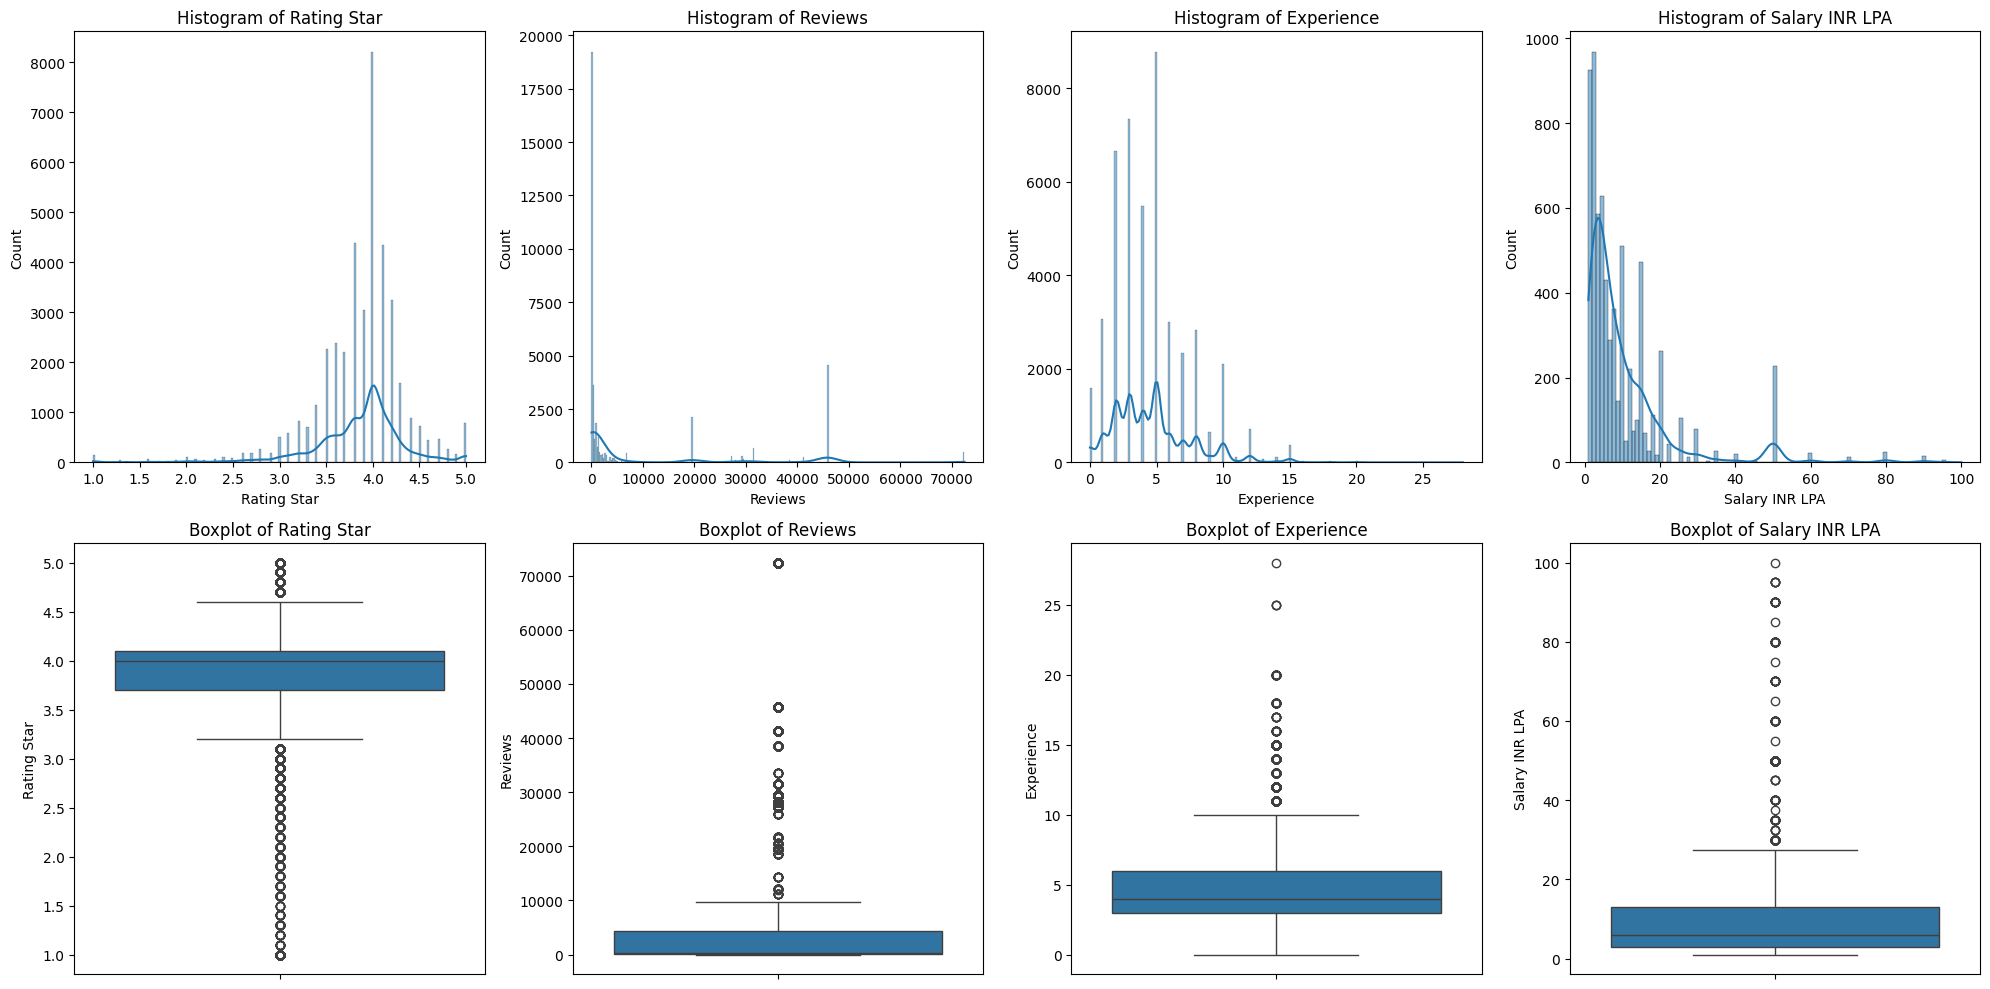

In [ ]:
# Univariate Analysis
numerical_columns = ['Rating Star', 'Reviews', 'Experience', 'Salary INR LPA']

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

# Plot histograms
for i, column in enumerate(numerical_columns):
    sns.histplot(cleaned_data[column].dropna(), ax=axes[0, i], kde=True)
    axes[0, i].set_title(f'Histogram of {column}')

# Plot boxplots
for i, column in enumerate(numerical_columns):
    sns.boxplot(y=cleaned_data[column].dropna(), ax=axes[1, i])
    axes[1, i].set_title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

Bivariate Analysis

Numerical vs Numerical: Scatter plots, correlation heatmaps.

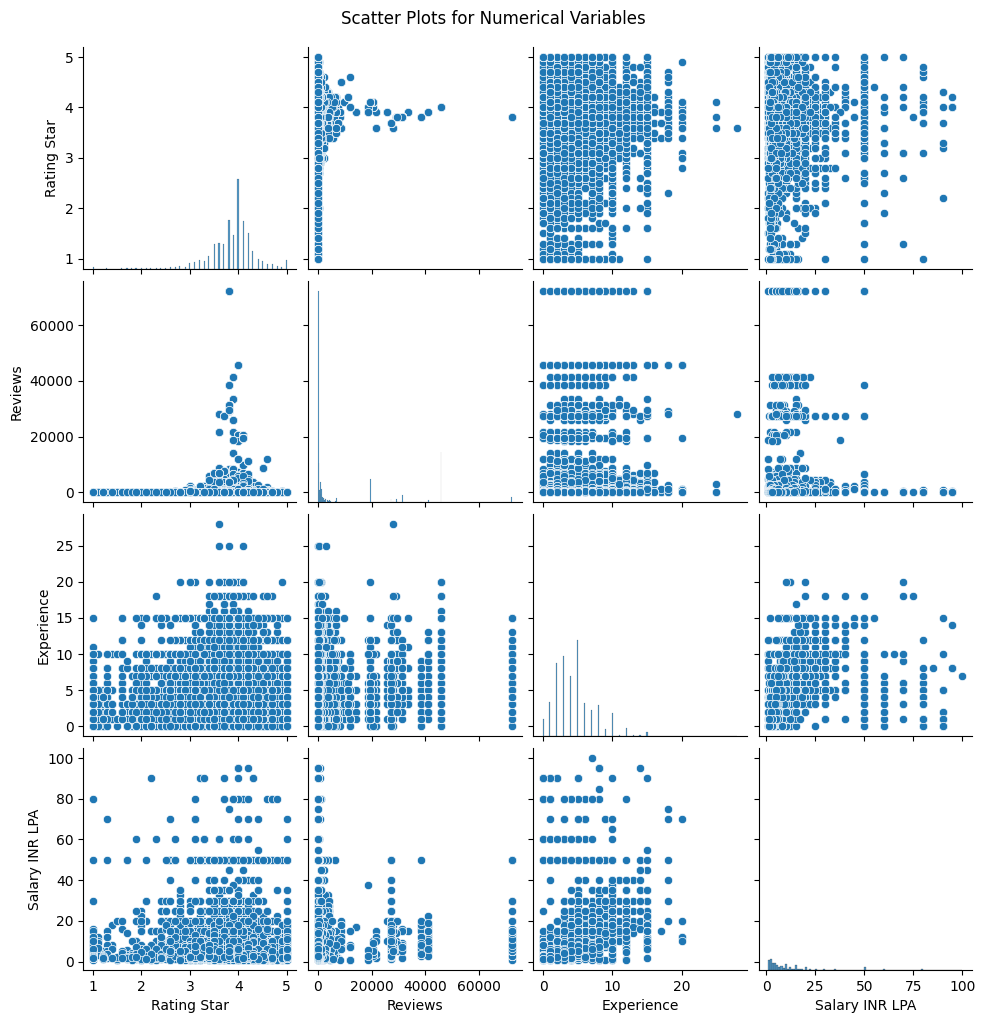

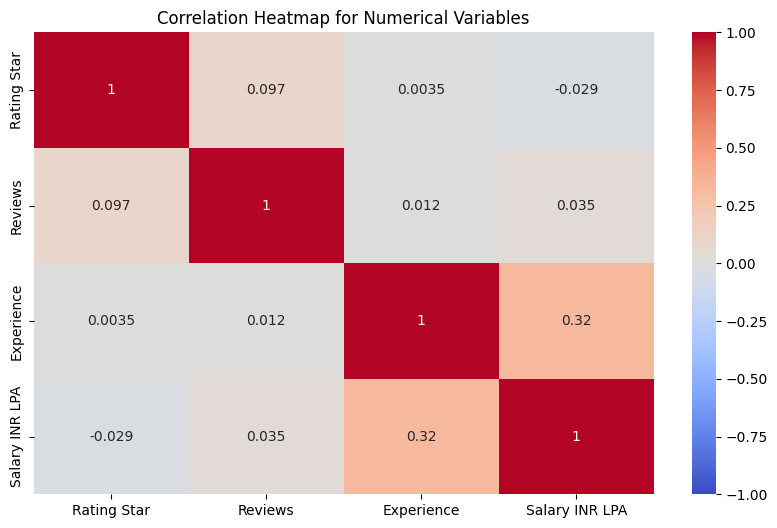

In [44]:
# Scatter plots for numerical vs numerical variables
sns.pairplot(cleaned_data[['Rating Star', 'Reviews', 'Experience', 'Salary INR LPA']])
plt.suptitle("Scatter Plots for Numerical Variables", y=1.02)
plt.show()

# Correlation heatmap
correlation_matrix = cleaned_data[['Rating Star', 'Reviews', 'Experience', 'Salary INR LPA']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap for Numerical Variables")
plt.show()

Numerical vs Categorical: Boxplots, violin plots, or group statistics

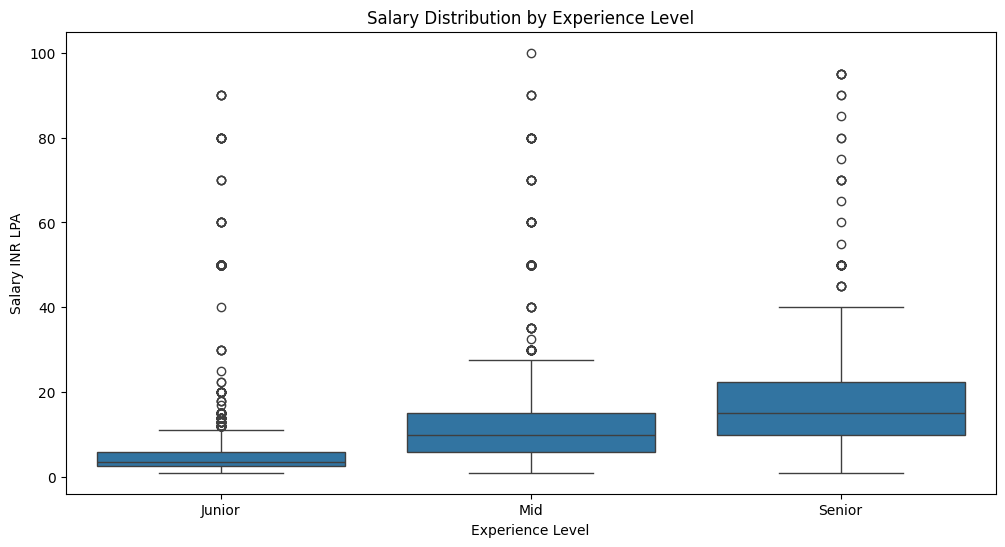

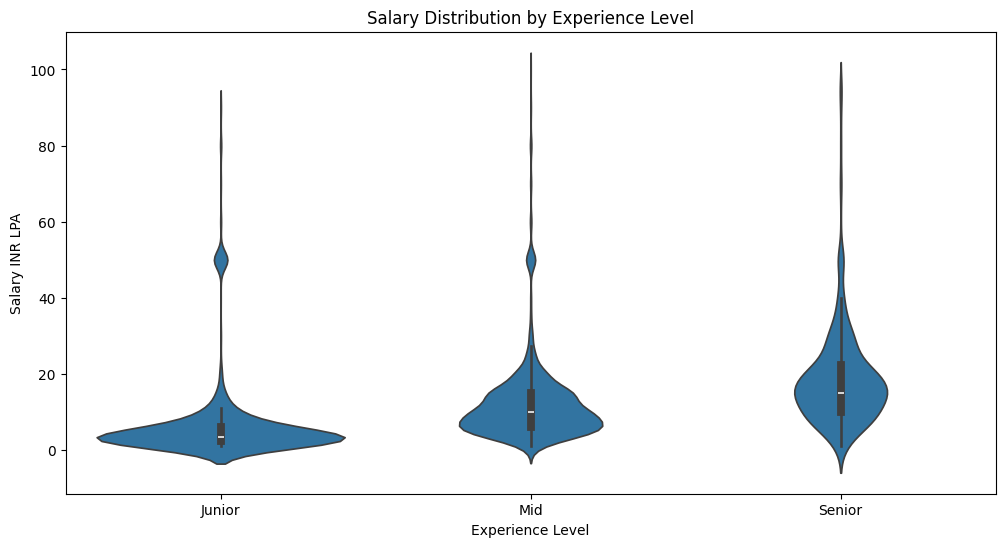

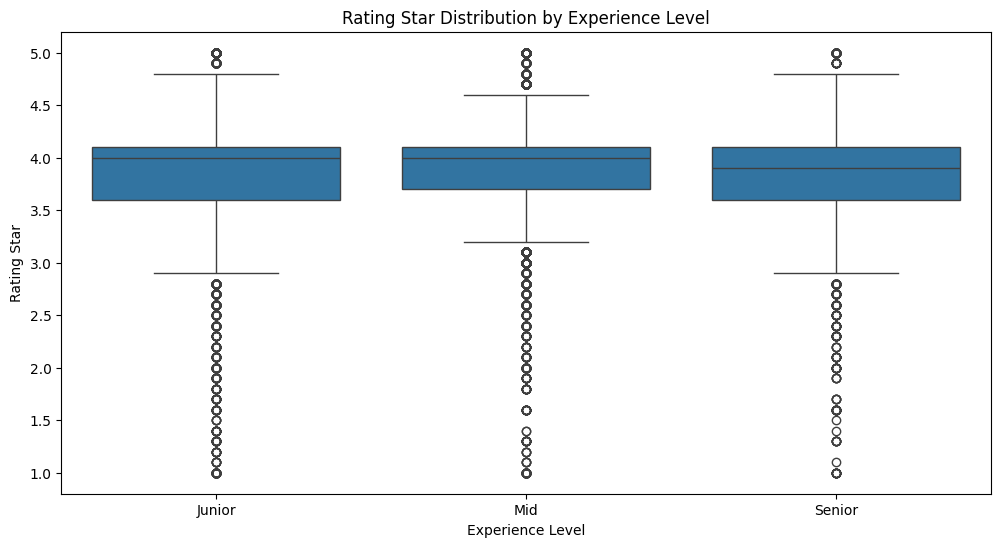

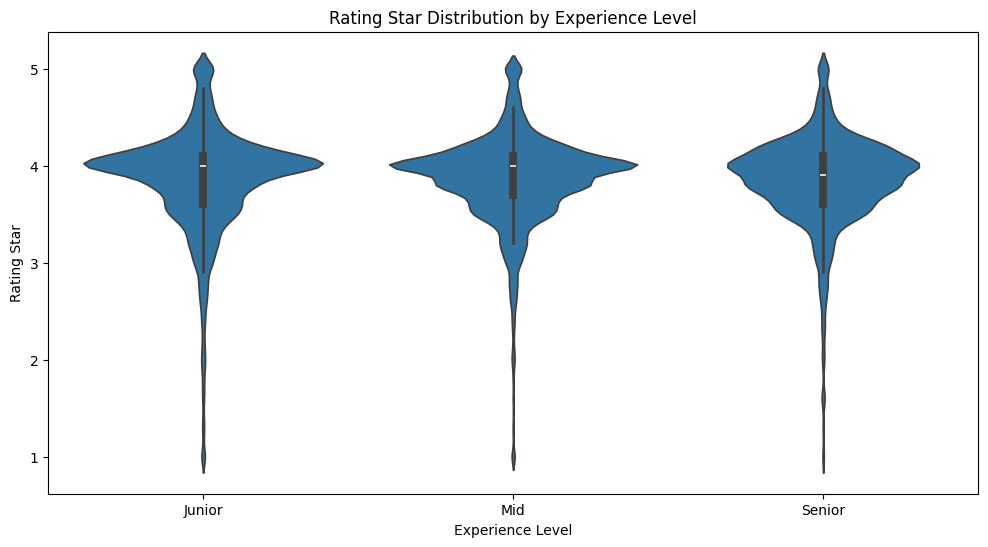

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot: Salary distribution by Experience Level
plt.figure(figsize=(12, 6))
sns.boxplot(data=cleaned_data, x='Experience Level', y='Salary INR LPA')
plt.title("Salary Distribution by Experience Level")
plt.show()

# Violin plot: Salary distribution by Experience Level
plt.figure(figsize=(12, 6))
sns.violinplot(data=cleaned_data, x='Experience Level', y='Salary INR LPA')
plt.title("Salary Distribution by Experience Level")
plt.show()

# Boxplot: Rating Star distribution by Experience Level
plt.figure(figsize=(12, 6))
sns.boxplot(data=cleaned_data, x='Experience Level', y='Rating Star')
plt.title("Rating Star Distribution by Experience Level")
plt.show()

# Violin plot: Rating Star distribution by Experience Level
plt.figure(figsize=(12, 6))
sns.violinplot(data=cleaned_data, x='Experience Level', y='Rating Star')
plt.title("Rating Star Distribution by Experience Level")
plt.show()

Categorical vs Categorical: Crosstabs, stacked bar charts.

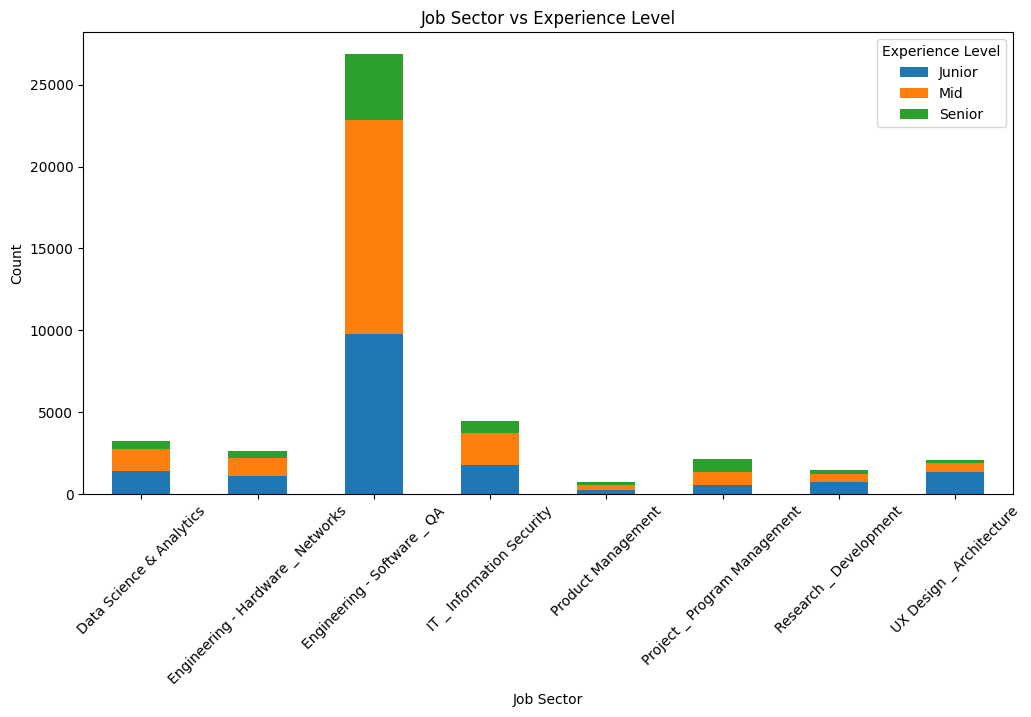

In [51]:
# Crosstab: Job Sector vs Experience Level
crosstab_sector_experience = pd.crosstab(cleaned_data['Job Sector'], cleaned_data['Experience Level'])

# Plotting the crosstab as a stacked bar chart
crosstab_sector_experience.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Job Sector vs Experience Level')
plt.xlabel('Job Sector')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Experience Level')
plt.show()



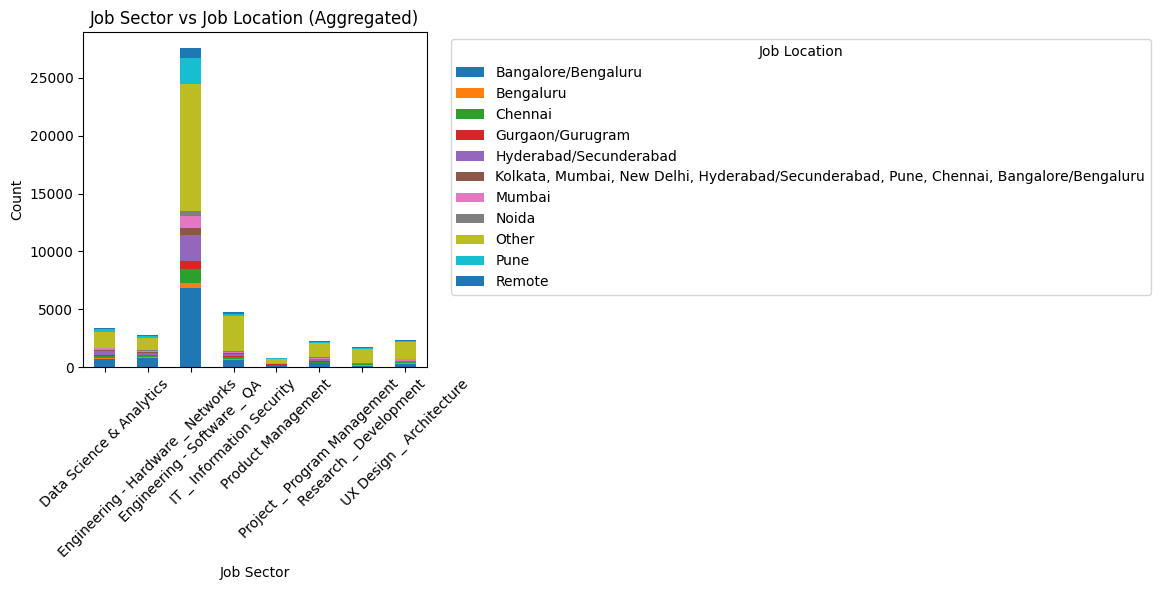

In [50]:
# Aggregate less frequent locations into 'Other'
top_locations = cleaned_data['Job Location'].value_counts().index[:10]  # Top 10 locations
cleaned_data['Job Location Aggregated'] = cleaned_data['Job Location'].apply(
    lambda x: x if x in top_locations else 'Other'
)

# Crosstab: Job Sector vs Job Location (Aggregated)
crosstab_sector_location = pd.crosstab(cleaned_data['Job Sector'], cleaned_data['Job Location Aggregated'])

# Plotting the crosstab as a stacked bar chart
crosstab_sector_location.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Job Sector vs Job Location (Aggregated)')
plt.xlabel('Job Sector')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Job Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Multivariate Analysis

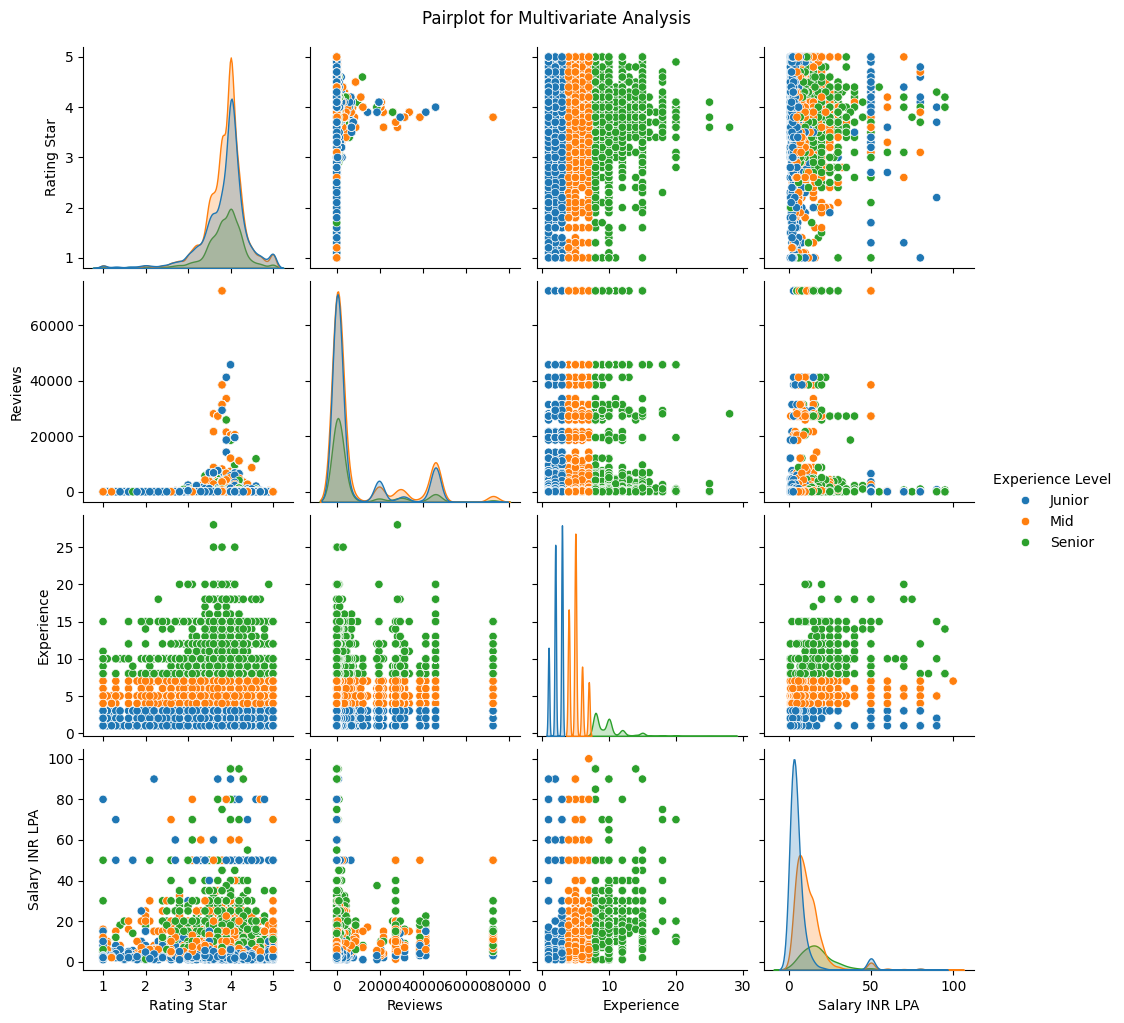

In [52]:
# Pairplot for multivariate analysis
sns.pairplot(cleaned_data, vars=['Rating Star', 'Reviews', 'Experience', 'Salary INR LPA'], hue='Experience Level')
plt.suptitle("Pairplot for Multivariate Analysis", y=1.02)
plt.show()

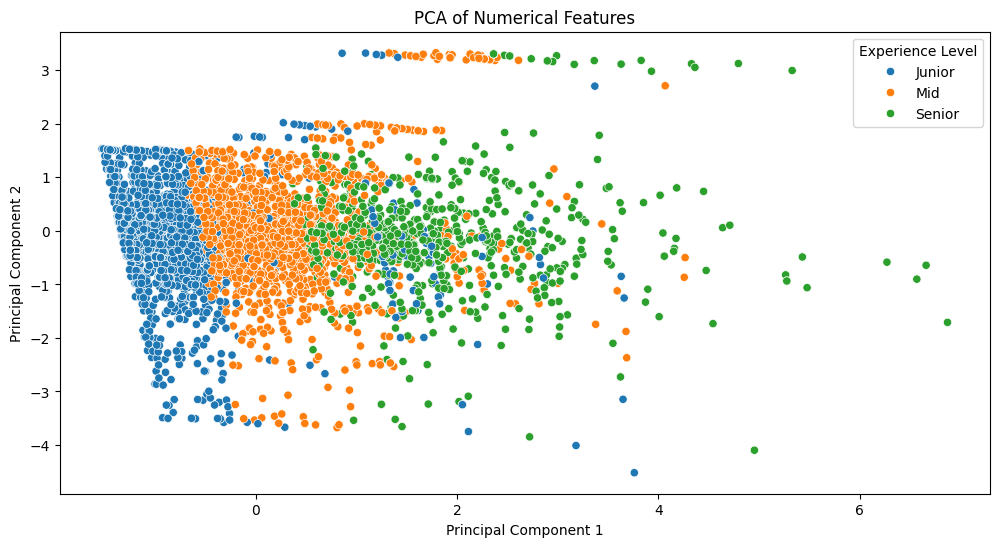

In [53]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select numerical columns for PCA
numerical_columns = ['Rating Star', 'Reviews', 'Experience', 'Salary INR LPA']
numerical_data = cleaned_data[numerical_columns].dropna()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# Add the Experience Level column for visualization
pca_df['Experience Level'] = cleaned_data.loc[numerical_data.index, 'Experience Level'].values

# Plot the PCA result
plt.figure(figsize=(12, 6))
sns.scatterplot(data=pca_df, x='Principal Component 1', y='Principal Component 2', hue='Experience Level')
plt.title('PCA of Numerical Features')
plt.show()

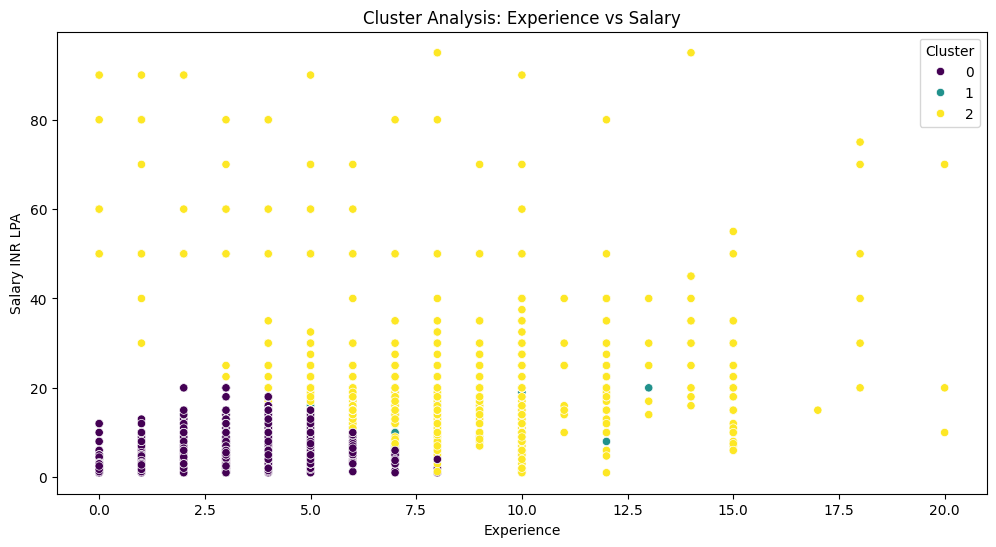

   Rating Star       Reviews  Experience  Salary INR LPA
0     3.781126    488.273328    2.889241        5.513547
1     3.777381  46664.601190    5.625000       11.540923
2     3.657633    895.204482    7.261204       23.797619


In [54]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select numerical columns for clustering
numerical_columns = ['Rating Star', 'Reviews', 'Experience', 'Salary INR LPA']
numerical_data = cleaned_data[numerical_columns].dropna()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # You can change the number of clusters
clusters = kmeans.fit_predict(scaled_data)

# Add the cluster labels to the dataframe
numerical_data['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(data=numerical_data, x='Experience', y='Salary INR LPA', hue='Cluster', palette='viridis')
plt.title('Cluster Analysis: Experience vs Salary')
plt.show()

# Display the cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=numerical_columns)
print(cluster_centers_df)

Feature Engineering

In [55]:
# Feature 1: Job Posting Age
cleaned_data['Job Posting Age'] = (datetime.now() - cleaned_data['job-post-day']).dt.days

# Feature 2: Salary Range
salary_bins = [0, 5, 10, 15, 20, np.inf]
salary_labels = ['0-5 LPA', '5-10 LPA', '10-15 LPA', '15-20 LPA', '20+ LPA']
cleaned_data['Salary Range'] = pd.cut(cleaned_data['Salary INR LPA'], bins=salary_bins, labels=salary_labels)

# Feature 3: High Demand Skill
high_demand_skills = top_skills.index.tolist()
cleaned_data['High Demand Skill'] = cleaned_data['Skills'].apply(lambda x: any(skill in x for skill in high_demand_skills))

# Display the new features
print(cleaned_data[['Job Posting Age', 'Salary Range', 'High Demand Skill']].head())

   Job Posting Age Salary Range  High Demand Skill
0                1          NaN               True
1                0          NaN               True
2                0          NaN               True
3                1          NaN               True
4                6          NaN               True


In [56]:
# Extract day of the week
cleaned_data['Day of Week'] = cleaned_data['job-post-day'].dt.day_name()

# Extract month
cleaned_data['Month'] = cleaned_data['job-post-day'].dt.month_name()

# Extract season
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

cleaned_data['Season'] = cleaned_data['job-post-day'].apply(get_season)

# Display the new features
print(cleaned_data[['Day of Week', 'Month', 'Season']].head())

  Day of Week    Month  Season
0   Wednesday  January  Winter
1    Thursday  January  Winter
2    Thursday  January  Winter
3   Wednesday  January  Winter
4      Friday  January  Winter


In [57]:
# Create lagged features for 'job-post-day'
cleaned_data['Job Post Day Lag 1'] = cleaned_data['job-post-day'].shift(1)
cleaned_data['Job Post Day Lag 2'] = cleaned_data['job-post-day'].shift(2)
cleaned_data['Job Post Day Lag 3'] = cleaned_data['job-post-day'].shift(3)

# Display the new lagged features
print(cleaned_data[['job-post-day', 'Job Post Day Lag 1', 'Job Post Day Lag 2', 'Job Post Day Lag 3']].head())

                job-post-day         Job Post Day Lag 1  \
0 2025-01-08 13:28:51.114508                        NaT   
1 2025-01-09 13:28:51.114508 2025-01-08 13:28:51.114508   
2 2025-01-09 13:28:51.114508 2025-01-09 13:28:51.114508   
3 2025-01-08 13:28:51.114508 2025-01-09 13:28:51.114508   
4 2025-01-03 13:28:51.114508 2025-01-08 13:28:51.114508   

          Job Post Day Lag 2         Job Post Day Lag 3  
0                        NaT                        NaT  
1                        NaT                        NaT  
2 2025-01-08 13:28:51.114508                        NaT  
3 2025-01-09 13:28:51.114508 2025-01-08 13:28:51.114508  
4 2025-01-09 13:28:51.114508 2025-01-09 13:28:51.114508  


Correlation and Dependencies

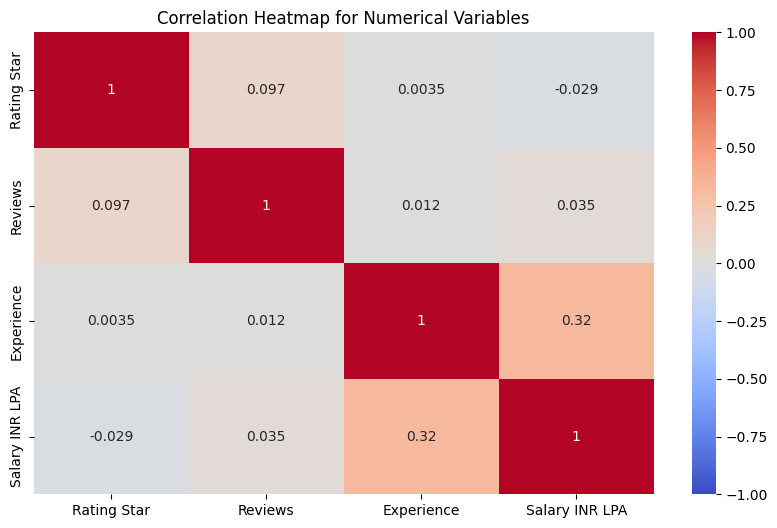

In [ ]:
# Compute the correlation matrix
correlation_matrix = cleaned_data[numerical_columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap for Numerical Variables")
plt.show()

Chi-square tests for independence of categorical variables.


In [59]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(cleaned_data['Job Sector'], cleaned_data['Experience Level'])

# Perform Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-square statistic: 1635.6420493499895
p-value: 0.0
Degrees of freedom: 14
Expected frequencies:
[[ 1273.748318    1463.19019177   526.06149023]
 [ 1024.69792668  1177.09906632   423.203007  ]
 [10479.63449128 12038.24820358  4328.11730514]
 [ 1734.37443361  1992.32424825   716.30131814]
 [  301.35878072   346.17923017   124.46198911]
 [  844.35109158   969.92963065   348.71927777]
 [  582.80914458   669.48910705   240.70174836]
 [  817.02581354   938.54032221   337.43386425]]


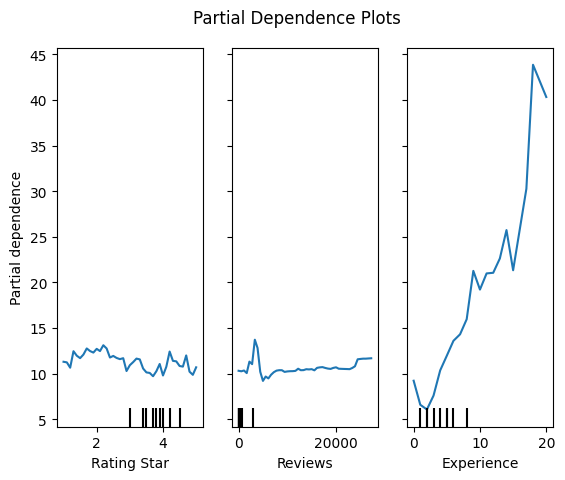

In [61]:
from sklearn.inspection import PartialDependenceDisplay
from sklearn.ensemble import RandomForestRegressor

# Prepare the data
X = cleaned_data[['Rating Star', 'Reviews', 'Experience', 'Salary INR LPA']].dropna()
y = X.pop('Salary INR LPA')

# Train a RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Plot partial dependence plots
features = ['Rating Star', 'Reviews', 'Experience']
display = PartialDependenceDisplay.from_estimator(model, X, features, grid_resolution=50, n_jobs=3)
display.figure_.suptitle('Partial Dependence Plots')
display.figure_.subplots_adjust(top=0.9)  # Adjust the title position
plt.show()

### Analysis of Job Trends and Seasonal Variations

In this section, we will analyze the job trends and seasonal variations in the job postings data. This analysis will help us understand how job postings vary over time and identify any seasonal patterns.

#### Job Trends Over Time

We start by examining the overall trend of job postings over time. This can help us identify any significant changes or patterns in the job market.

```python
# Aggregate job counts by month

#### Seasonal Variations

Next, we analyze the seasonal variations in job postings. This can help us understand if there are any specific times of the year when job postings are higher or lower.

```python
# Extract month and season from job-post-day

# Aggregate job counts by month and season

#### Day of the Week Analysis

We also analyze the distribution of job postings by the day of the week to see if there are any specific days when job postings are more frequent.

```python
# Extract day of the week from job-post-day

```

By analyzing these trends, we can gain valuable insights into the job market dynamics and identify any patterns that may be useful for job seekers and employers.


In [64]:
# Set 'job-post-day' as the index
cleaned_data.set_index('job-post-day', inplace=True)

# Sort the data by the index to ensure it is in chronological order
cleaned_data.sort_index(inplace=True)

# Display the first few rows to verify the changes
print(cleaned_data.head())

                                          Job Sector  \
job-post-day                                           
2024-12-10 13:28:51.115508  Data Science & Analytics   
2024-12-10 13:28:51.116509  Data Science & Analytics   
2024-12-10 13:28:51.116509  Data Science & Analytics   
2024-12-10 13:28:51.116509  Data Science & Analytics   
2024-12-10 13:28:51.116509  Data Science & Analytics   

                                                   Job Title  \
job-post-day                                                   
2024-12-10 13:28:51.115508     Specialist - People Analytics   
2024-12-10 13:28:51.116509                  Business Analyst   
2024-12-10 13:28:51.116509                  Business Analyst   
2024-12-10 13:28:51.116509              Senior Data Engineer   
2024-12-10 13:28:51.116509  Machine Learning and AI Engineer   

                                     comp-name  Rating Star  Reviews  \
job-post-day                                                           
2024-12-10 13:

In [67]:
# Exclude categorical columns before interpolation
categorical_columns = cleaned_data.select_dtypes(include=['category', 'bool', 'object']).columns
non_categorical_data = cleaned_data.drop(columns=categorical_columns)

# Interpolate missing values for non-categorical data
non_categorical_data = non_categorical_data.interpolate(method='linear')

# Forward fill remaining missing values
non_categorical_data = non_categorical_data.ffill()

# Backward fill remaining missing values
non_categorical_data = non_categorical_data.bfill()

# Combine the interpolated data with the categorical data
cleaned_data[categorical_columns] = cleaned_data[categorical_columns]
cleaned_data[non_categorical_data.columns] = non_categorical_data

# Display the first few rows to verify the changes
print(cleaned_data.head())

                                          Job Sector  \
job-post-day                                           
2024-12-10 13:28:51.115508  Data Science & Analytics   
2024-12-10 13:28:51.116509  Data Science & Analytics   
2024-12-10 13:28:51.116509  Data Science & Analytics   
2024-12-10 13:28:51.116509  Data Science & Analytics   
2024-12-10 13:28:51.116509  Data Science & Analytics   

                                                   Job Title  \
job-post-day                                                   
2024-12-10 13:28:51.115508     Specialist - People Analytics   
2024-12-10 13:28:51.116509                  Business Analyst   
2024-12-10 13:28:51.116509                  Business Analyst   
2024-12-10 13:28:51.116509              Senior Data Engineer   
2024-12-10 13:28:51.116509  Machine Learning and AI Engineer   

                                     comp-name  Rating Star  Reviews  \
job-post-day                                                           
2024-12-10 13:

In [68]:
# Ensure the dataset is time-indexed
if not cleaned_data.index.name == 'job-post-day':
    cleaned_data.set_index('job-post-day', inplace=True)

# Sort the data by the index to ensure it is in chronological order
cleaned_data.sort_index(inplace=True)

# Display the first few rows to verify the changes
print(cleaned_data.head())

                                          Job Sector  \
job-post-day                                           
2024-12-10 13:28:51.115508  Data Science & Analytics   
2024-12-10 13:28:51.116509  Data Science & Analytics   
2024-12-10 13:28:51.116509  Data Science & Analytics   
2024-12-10 13:28:51.116509  Data Science & Analytics   
2024-12-10 13:28:51.116509  Data Science & Analytics   

                                                   Job Title  \
job-post-day                                                   
2024-12-10 13:28:51.115508     Specialist - People Analytics   
2024-12-10 13:28:51.116509                  Business Analyst   
2024-12-10 13:28:51.116509                  Business Analyst   
2024-12-10 13:28:51.116509              Senior Data Engineer   
2024-12-10 13:28:51.116509  Machine Learning and AI Engineer   

                                     comp-name  Rating Star  Reviews  \
job-post-day                                                           
2024-12-10 13:

In [69]:
# Ensure the dataset is time-indexed
if not cleaned_data.index.name == 'job-post-day':
    cleaned_data.set_index('job-post-day', inplace=True)

# Sort the data by the index to ensure it is in chronological order
cleaned_data.sort_index(inplace=True)

# Aggregate data based on the time unit
# For daily aggregation
daily_data = cleaned_data.resample('D').size()

# For monthly aggregation
monthly_data = cleaned_data.resample('M').size()

# For quarterly aggregation
quarterly_data = cleaned_data.resample('Q').size()

# Display the aggregated data
print("Daily Data:")
print(daily_data.head())
print("\nMonthly Data:")
print(monthly_data.head())
print("\nQuarterly Data:")
print(quarterly_data.head())

Daily Data:
job-post-day
2024-12-10      77
2024-12-11     558
2024-12-12    1340
2024-12-13    1425
2024-12-14    1455
Freq: D, dtype: int64

Monthly Data:
job-post-day
2024-12-31    25724
2025-01-31    19842
Freq: ME, dtype: int64

Quarterly Data:
job-post-day
2024-12-31    25724
2025-03-31    19842
Freq: QE-DEC, dtype: int64


C:\Users\gzar9\AppData\Local\Temp\ipykernel_29772\2603484679.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = cleaned_data.resample('M').size()
C:\Users\gzar9\AppData\Local\Temp\ipykernel_29772\2603484679.py:16: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_data = cleaned_data.resample('Q').size()


c:\Users\gzar9\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


RMSE: 1097.088858184346
MAE: 894.5812935820094
MAPE: 65.8580536692355%


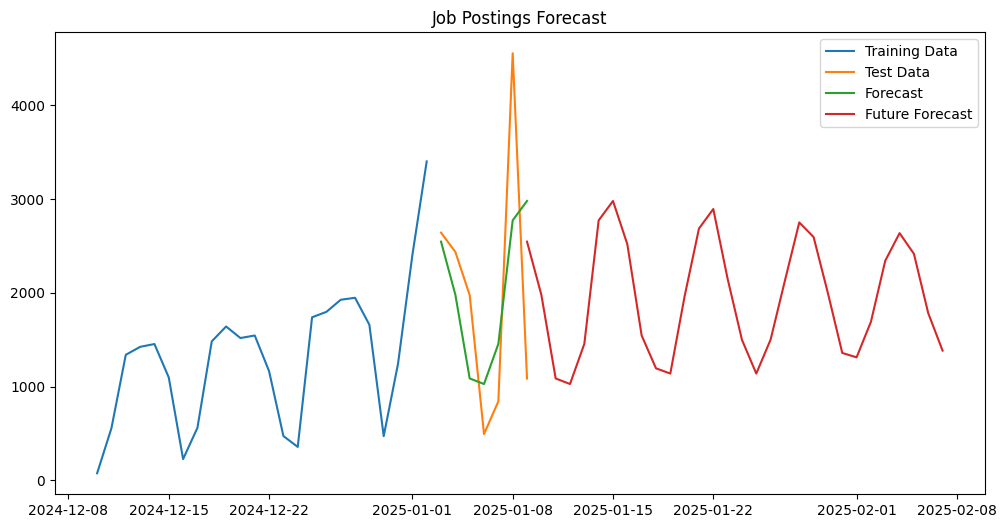

In [70]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Split the data into training and testing sets (80%-20%)
train_size = int(len(daily_data) * 0.8)
train, test = daily_data[:train_size], daily_data[train_size:]

# Train the ARIMA model
model = ARIMA(train, order=(5, 1, 0))  # You can adjust the order (p, d, q) as needed
model_fit = model.fit()

# Forecast on the test set
forecast = model_fit.forecast(steps=len(test))
test_index = test.index

# Evaluate performance
rmse = np.sqrt(mean_squared_error(test, forecast))
mae = mean_absolute_error(test, forecast)
mape = np.mean(np.abs((test - forecast) / test)) * 100

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}%')

# Forecast future values
future_steps = 30  # Number of days to forecast
future_forecast = model_fit.forecast(steps=future_steps)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test_index, test, label='Test Data')
plt.plot(test_index, forecast, label='Forecast')
plt.plot(pd.date_range(start=test_index[-1], periods=future_steps, freq='D'), future_forecast, label='Future Forecast')
plt.legend()
plt.title('Job Postings Forecast')
plt.show()


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 1.0/124.9 MB 3.4 MB/s eta 0:00:37
    --------------------------------------- 1.8/124.9 MB 3.6 MB/s eta 0:00:35
   - -------------------------------------- 3.1/124.9 MB 4.4 MB/s eta 0:00:28
   - -------------------------------------- 4.5/124.9 MB 4.7 MB/s eta 0:00:26
   - -------------------------------------- 6.0/124.9 MB 5.3 MB/s eta 0:00:23
   -- ------------------------------------- 7.9/124.9 MB 5.9 MB/s eta 0:00:20
   --- ------------------------------------ 9.7/124.9 MB 6.2 MB/s eta 0:00:19
   --- ------------------------------------ 11.5/124.9 MB 6.6 MB/s eta 0:00:18
   ---- ----------------------------------- 13.4/124.9 MB 6.9 MB/s eta 0:00:17
   ---- ----------------------------------- 14.2/124.9 MB 6.6 MB/s eta 0:00:17
   ---- ----------------------------------- 15.5/124.9 MB 6.5 MB/s eta 0:00

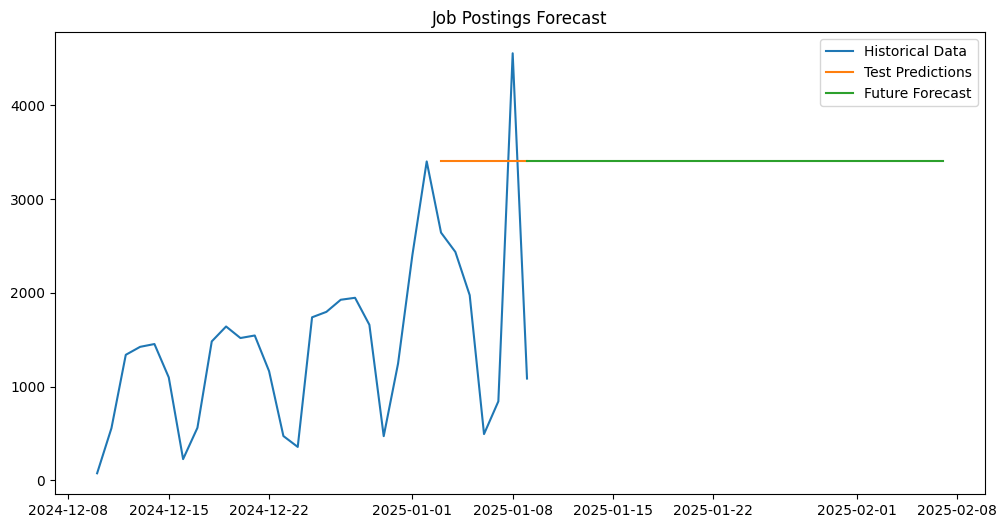

In [73]:
%pip install xgboost

import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Ensure the dataset is time-indexed
if not cleaned_data.index.name == 'job-post-day':
    cleaned_data.set_index('job-post-day', inplace=True)

# Sort the data by the index to ensure it is in chronological order
cleaned_data.sort_index(inplace=True)

# Aggregate data based on the time unit (daily in this case)
daily_data = cleaned_data.resample('D').size()

# Create features and target variable
X = np.arange(len(daily_data)).reshape(-1, 1)  # Time as the feature
y = daily_data.values  # Job postings count as the target

# Split the data into training and testing sets (80%-20%)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Train the XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}%')
print(f'R-squared: {r2}')

# Forecast future values
future_steps = 30  # Number of days to forecast
X_future = np.arange(len(X), len(X) + future_steps).reshape(-1, 1)
future_forecast = model.predict(X_future)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data, label='Historical Data')
plt.plot(daily_data.index[train_size:], y_pred, label='Test Predictions')
plt.plot(pd.date_range(start=daily_data.index[-1], periods=future_steps, freq='D'), future_forecast, label='Future Forecast')
plt.legend()
plt.title('Job Postings Forecast')
plt.show()

c:\Users\gzar9\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
21/21 - 2s - 86ms/step - loss: 0.0585
Epoch 2/20
21/21 - 0s - 3ms/step - loss: 0.0390
Epoch 3/20
21/21 - 0s - 2ms/step - loss: 0.0307
Epoch 4/20
21/21 - 0s - 3ms/step - loss: 0.0301
Epoch 5/20
21/21 - 0s - 3ms/step - loss: 0.0298
Epoch 6/20
21/21 - 0s - 2ms/step - loss: 0.0310
Epoch 7/20
21/21 - 0s - 2ms/step - loss: 0.0291
Epoch 8/20
21/21 - 0s - 3ms/step - loss: 0.0280
Epoch 9/20
21/21 - 0s - 3ms/step - loss: 0.0283
Epoch 10/20
21/21 - 0s - 2ms/step - loss: 0.0264
Epoch 11/20
21/21 - 0s - 2ms/step - loss: 0.0262
Epoch 12/20
21/21 - 0s - 3ms/step - loss: 0.0264
Epoch 13/20
21/21 - 0s - 2ms/step - loss: 0.0314
Epoch 14/20
21/21 - 0s - 3ms/step - loss: 0.0265
Epoch 15/20
21/21 - 0s - 2ms/step - loss: 0.0250
Epoch 16/20
21/21 - 0s - 2ms/step - loss: 0.0253
Epoch 17/20
21/21 - 0s - 2ms/step - loss: 0.0237
Epoch 18/20
21/21 - 0s - 2ms/step - loss: 0.0258
Epoch 19/20
21/21 - 0s - 2ms/step - loss: 0.0253
Epoch 20/20
21/21 - 0s - 2ms/step - loss: 0.0253
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

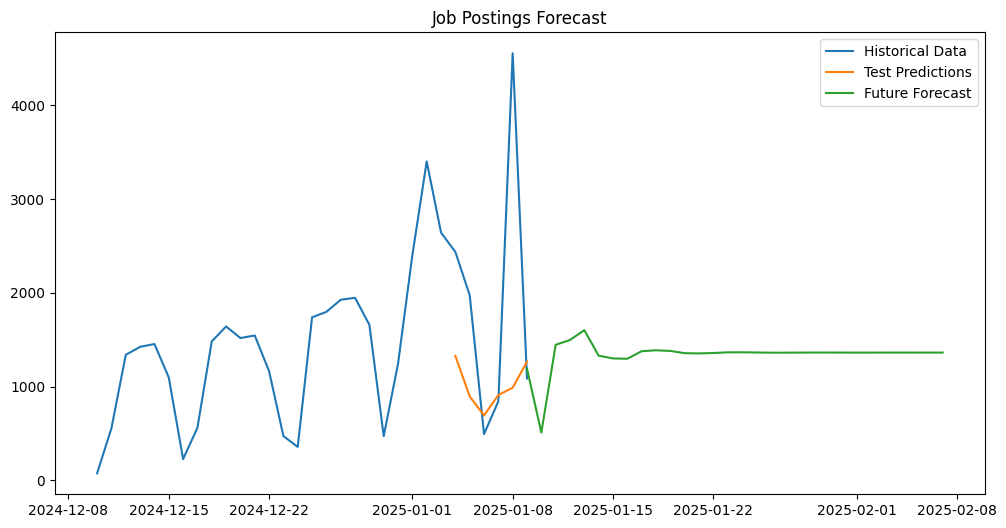

In [74]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import matplotlib.pyplot as plt

# Ensure the dataset is time-indexed
if not cleaned_data.index.name == 'job-post-day':
    cleaned_data.set_index('job-post-day', inplace=True)

# Sort the data by the index to ensure it is in chronological order
cleaned_data.sort_index(inplace=True)

# Aggregate data based on the time unit (daily in this case)
daily_data = cleaned_data.resample('D').size()

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(daily_data.values.reshape(-1, 1))

# Prepare the data for LSTM
def create_dataset(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)

look_back = 3
X, y = create_dataset(scaled_data, look_back)

# Split the data into training and testing sets (80%-20%)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=1, verbose=2)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the predictions
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform([y_train])
y_test = scaler.inverse_transform([y_test])

# Evaluate performance
rmse = np.sqrt(mean_squared_error(y_test[0], test_predict[:, 0]))
mae = mean_absolute_error(y_test[0], test_predict[:, 0])
mape = np.mean(np.abs((y_test[0] - test_predict[:, 0]) / y_test[0])) * 100
r2 = r2_score(y_test[0], test_predict[:, 0])

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}%')
print(f'R-squared: {r2}')

# Forecast future values
future_steps = 30  # Number of days to forecast
future_forecast = []
last_data = scaled_data[-look_back:]
for _ in range(future_steps):
    prediction = model.predict(last_data.reshape(1, look_back, 1))
    future_forecast.append(prediction[0, 0])
    last_data = np.append(last_data[1:], prediction)

future_forecast = scaler.inverse_transform(np.array(future_forecast).reshape(-1, 1))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data, label='Historical Data')
plt.plot(daily_data.index[train_size + look_back + 1:], test_predict, label='Test Predictions')
plt.plot(pd.date_range(start=daily_data.index[-1], periods=future_steps, freq='D'), future_forecast, label='Future Forecast')
plt.legend()
plt.title('Job Postings Forecast')
plt.show()